# Strata objects: Legend and Column

Strata is stratigraphic data.

The main object of `strata` submodule is `mplStrater.strata.Column` which represents the single stratigraphic column.
This example shows the structure of the class and how to use it.

First, import all required packages and load the example dataset.

In [8]:
%load_ext autoreload
%autoreload 2
from mplStrater.data import StrataFrame
from mplStrater.strata import Column,Legend

import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
df=pd.read_csv("../../../data/example.csv")
df.head()

x            y    ID  from   to              fill       hatch lbl1  \
0  204026.93  4973197.522  SI01   0.0  0.6  Riporto conforme           _    _   
1  204026.93  4973197.522  SI01   0.6  2.0  Assenza campione           _    _   
2  204026.93  4973197.522  SI01   2.0  3.5           Rifiuto  Pericoloso   IA   
3  204026.93  4973197.522  SI01   3.5  5.2  Assenza campione           _    _   
4  204026.93  4973197.522  SI01   5.2  6.2           Rifiuto  Pericoloso   NP   

           lbl2  lbl3  
0             _    -1  
1             _    -1  
2  non rilevato    -1  
3             _    -1  
4  non rilevato    -1

Then, initiate a `mpl.StrataFrame` providing a `pandas.DataFrame` and specifying its `epsg` code. 

In [10]:
sf=StrataFrame(
    df=df,
    epsg=32633)

## Define a `Legend`.

This is done providing a dictionary containing pairs of (value-specification) the `fill_dict` parameter and for the `hatch_fill` parameter.

The dictionary matches dataframe `fill` and `hatch` column values to either a *matplotlib encoded color* or *encoded hatch* string.

The example uses the following dictionaries.

In [11]:
fill_dict={
    'Terreno conforme': 'lightgreen',
    'Riporto conforme': 'darkgreen',
    'Riporto non conforme': 'orange',
    'Rifiuto': 'red',
    'Assenza campione': 'white'
    }

hatch_dict={
    'Non pericoloso': '',
    'Pericoloso': 'xxxxxxxxx',
    '_': ''
    }

In [12]:
l=Legend(
    fill_dict=fill_dict,
    hatch_dict=hatch_dict
)

## Plot stand-alone `Column` objects

Imagine we would need to inspect closely a column. It's not sure that we would be able to clearly do it on the map with all other elements (labels, basemap...). Unless exporting the map in pdf with a high resolution, open the local file... would take sooo long! Therefore `Column` object has its own `plot()` method.

Let's plot the first three columns of the strataframe.

In [13]:
sf.strataframe[:3]

ID           x            y  \
0  SI01  204026.930  4973197.522   
1  SI02  204008.591  4973148.940   
2  SI03  204008.734  4973122.605   

                                           fill_list  \
0  [Riporto conforme, Assenza campione, Rifiuto, ...   
1  [Riporto non conforme, Assenza campione, Rifiu...   
2  [Assenza campione, Riporto non conforme, Assen...   

                                           layers  \
0  [0.0, 0.6, 2.0, 3.5, 5.2, 6.2, 8.0, 9.0, 10.0]   
1                  [0.0, 2.0, 3.0, 6.0, 6.6, 8.5]   
2        [0.0, 1.5, 3.4, 5.0, 6.0, 8.4, 8.5, 9.0]   

                                          hatch_list  \
0      [_, _, Pericoloso, _, Pericoloso, _, _, _, _]   
1  [Non pericoloso, _, Non pericoloso, _, Non per...   
2  [_, Non pericoloso, _, Non pericoloso, Non per...   

                       lbl1_list  \
0  [_, _, IA, _, NP, _, _, _, _]   
1         [NP, _, NP, _, NP, NP]   
2    [_, NP, _, NP, NP, _, _, _]   

                                           lbl2_list  \
0  [_, _, non rilevato, _, non rilevato, _, _, _, _]   
1  [non rilevato, _, non rilevato, _, non rilevat...   
2  [_, non rilevato, _, non rilevato, non rilevat...   

                              lbl3_list  scale                        geometry  
0  [-1, -1, -1, -1, -1, -1, -1, -1, -1]   10.0  POINT (204026.930 4973197.522)  
1              [-1, -1, -1, -1, -1, -1]    8.5  POINT (204008.591 4973148.940)  
2      [-1, -1, -1, -1, -1, -1, -1, -1]    9.0  POINT (204008.734 4973122.605)

Plot the first three columns contained in the `StrataFrame`.

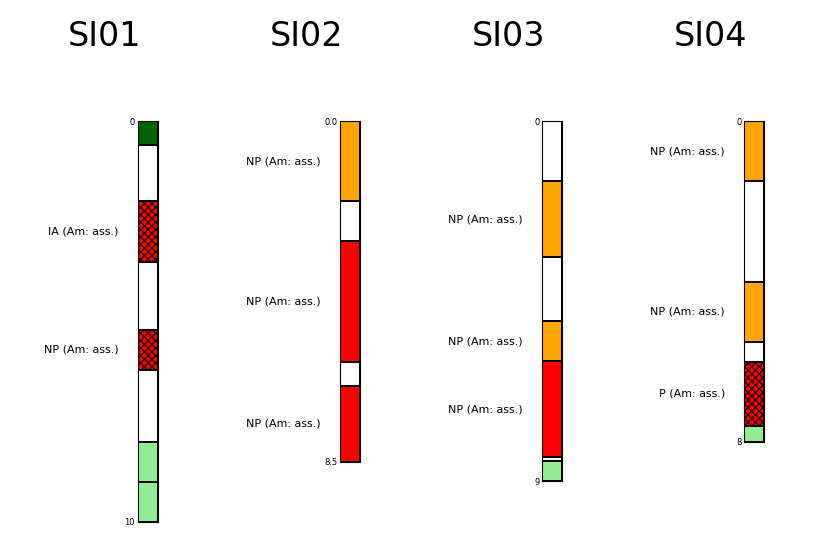

In [14]:
#create figure
f,axes=plt.subplots(1,4,figsize=(5,3),dpi=200,frameon=False)
for ax,i in zip(axes,range(4)):
    ax.axis('off')
    #instantiate class
    c=Column(
        #figure
        ax,l,
        #id
        sf.strataframe.loc[i,"ID"],
        #coords
        (0.9,0.9),
        #scale
        sf.strataframe.loc[i,"scale"],
        3,
        #stratigraphic data
        sf.strataframe.loc[i,"layers"],
        sf.strataframe.loc[i,"fill_list"],
        sf.strataframe.loc[i,"hatch_list"],
        #labels
        sf.strataframe.loc[i,"lbl1_list"],
        sf.strataframe.loc[i,"lbl2_list"],
        sf.strataframe.loc[i,"lbl3_list"])
    ax.set_title(c.id)
    c.fill_column()
    c.set_inset_params()
    c.label_column(hardcoding=None)